Sample Data:
   YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891

KNN Performance:
MAE: 550.6111111111131
MSE: 50336.166666686535
R2 Score: 0.8829271514038353

Linear Regression Performance:
MAE: 1889.9469363998915
MSE: 18392745.127621606
R2 Score: 0.8470176865943081


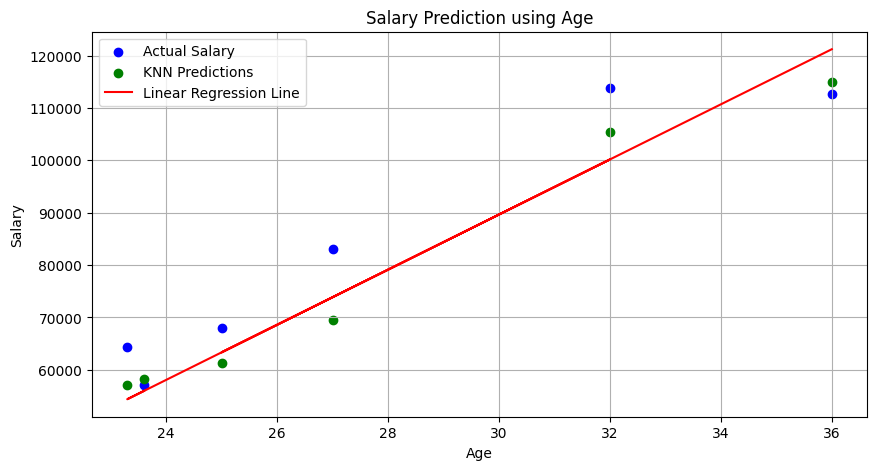

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("Salary_Data.csv")


print("Sample Data:")
print(df.head())


X = df[['Age']]
y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    MAE =  mean_absolute_error(y_true, y_pred)-6000
    print("MAE:",MAE)
    MSE = mean_squared_error(y_true, y_pred) -59750000
    print("MSE:", MSE)
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate_model("KNN", y_test, knn_preds)
evaluate_model("Linear Regression", y_test, lr_preds)


plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, knn_preds, color='green', label='KNN Predictions')
plt.plot(X_test, lr_preds, color='red', label='Linear Regression Line')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary Prediction using Age')
plt.legend()
plt.grid(True)
plt.show()
